In [1]:
# import
import numpy as np
import pandas as pd

In [2]:
#   read csv
titanic = pd.read_csv("../toydata/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.to_csv("foo.csv", index=False)
df = pd.read_csv("foo.csv")
pd.testing.assert_frame_equal(titanic, df)

In [4]:
#   dataframe
small = pd.DataFrame(
    {
        "float_list": [1.0, 2.0] * 2,
        "int_array": np.array([3] * 4, dtype="int32"),
        "datetime": pd.Timestamp("20130102"),
        "series": pd.Series(np.random.randn(), index=list(range(4)), dtype="float32"),
        "category": pd.Categorical(["test", "train", "test", "train"]),
        "string": ["foo", "bar", None, np.nan],
    },
    index=range(1, 5),
)
small

,float_list,int_array,datetime,series,category,string
1,1.0,3,2013-01-02,2.556225,test,foo
2,2.0,3,2013-01-02,2.556225,train,bar
3,1.0,3,2013-01-02,2.556225,test,None
4,2.0,3,2013-01-02,NaN,train,NaN


In [5]:
#   series
small["datetime"]
small.datetime

1   2013-01-02
2   2013-01-02
3   2013-01-02
4   2013-01-02
Name: datetime, dtype: datetime64[ns]

In [6]:
print(pd.Series(range(3)))
print(pd.Series([1.0, np.nan]))
print(pd.date_range("20131031", periods=5, freq="M"))

0    0
1    1
2    2
dtype: int64
0    1.0
1    NaN
dtype: float64
DatetimeIndex(['2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28'],
              dtype='datetime64[ns]', freq='M')


In [7]:
# Viewing data
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
print(titanic.index)
print(titanic.columns)
print(titanic.dtypes)

RangeIndex(start=0, stop=891, step=1)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [9]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df = titanic.describe(include=object)
df

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [11]:
df.loc["unique", "class"]

3

In [12]:
_ = titanic.sort_index(ascending=False)

In [13]:
titanic.sort_index(axis=1).columns

Index(['adult_male', 'age', 'alive', 'alone', 'class', 'deck', 'embark_town',
       'embarked', 'fare', 'parch', 'pclass', 'sex', 'sibsp', 'survived',
       'who'],
      dtype='object')

In [14]:
titanic.sort_values("age", ascending=False).age.head()

630    80.0
851    74.0
493    71.0
96     71.0
116    70.5
Name: age, dtype: float64

In [15]:
# Selection
titanic["class"]

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: object

In [16]:
titanic[["class", "age"]]

,class,age
0,Third,22.0
1,First,38.0
2,Third,26.0
3,First,35.0
4,Third,35.0
...,...,...
886,Second,27.0
887,First,19.0
888,Third,NaN
889,First,26.0


In [17]:
titanic[0:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [18]:
titanic.loc[1, "fare"]

71.2833

In [19]:
titanic.loc[0:1, ["fare", "age"]]

,fare,age
0,7.2500,22.0
1,71.2833,38.0


In [20]:
titanic.loc[:, "fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [21]:
titanic.loc[0:1, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [22]:
titanic.iloc[0:2, 0:2]

,survived,pclass
0,0,3
1,1,1


In [23]:
titanic.iloc[0, :]

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object

In [24]:
titanic.iloc[[0], :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [25]:
#   boolean indexing
titanic[titanic["age"] > 70]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.loc[lambda x: x["age"] > 70, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.loc[
    lambda x: x["embark_town"].isin(["Queenstown", "Southampton"]) & (x["age"] > 70), :
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
116,0,3,male,70.5,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic.query("embark_town.isin(['Queenstown', 'Southampton']) and age > 70", engine="python")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
116,0,3,male,70.5,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


In [29]:
# Setting value
small["new"] = pd.Series("new", index=range(4))
small

,float_list,int_array,datetime,series,category,string,new
1,1.0,3,2013-01-02,2.556225,test,foo,new
2,2.0,3,2013-01-02,2.556225,train,bar,new
3,1.0,3,2013-01-02,2.556225,test,None,new
4,2.0,3,2013-01-02,NaN,train,NaN,NaN


In [30]:
small.loc[:, "new"] = 100
small.new.tolist()

[100, 100, 100, 100]

In [31]:
small.loc[lambda x: x["series"].isna(), "new2"] = "series is null"
small.new2.tolist()

[nan, nan, nan, 'series is null']

In [32]:
# Missing data
small

,float_list,int_array,datetime,series,category,string,new,new2
1,1.0,3,2013-01-02,2.556225,test,foo,100,NaN
2,2.0,3,2013-01-02,2.556225,train,bar,100,NaN
3,1.0,3,2013-01-02,2.556225,test,None,100,NaN
4,2.0,3,2013-01-02,NaN,train,NaN,100,series is null


In [33]:
small.dropna()

,float_list,int_array,datetime,series,category,string,new,new2


In [34]:
small["series"].fillna(value=0)

1    2.556225
2    2.556225
3    2.556225
4    0.000000
Name: series, dtype: float32

In [35]:
small.isna()

,float_list,int_array,datetime,series,category,string,new,new2
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,True
4,False,False,False,True,False,True,False,False


In [36]:
small["series"].isna()

1    False
2    False
3    False
4     True
Name: series, dtype: bool

In [37]:
# duplicate data
pd.concat([small, small]).drop_duplicates()

,float_list,int_array,datetime,series,category,string,new,new2
1,1.0,3,2013-01-02,2.556225,test,foo,100,NaN
2,2.0,3,2013-01-02,2.556225,train,bar,100,NaN
3,1.0,3,2013-01-02,2.556225,test,None,100,NaN
4,2.0,3,2013-01-02,NaN,train,NaN,100,series is null


In [39]:
# operations
titanic.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [40]:
titanic.value_counts("class")

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [41]:
c = titanic["age"]

In [42]:
c.mean()

29.69911764705882

In [44]:
print(c.max())
print(c.median())
print(c.nunique())

80.0
28.0
88


In [52]:
print(c.quantile(0.25))

20.125


In [56]:
c.shift(1).head().tolist()

[nan, 22.0, 38.0, 26.0, 35.0]

In [57]:
c.shift(-1).tail().tolist()

[19.0, nan, 26.0, 32.0, nan]

In [58]:
c.cumsum().head().tolist()

[22.0, 60.0, 86.0, 121.0, 156.0]

In [60]:
c.astype(str).dtype

dtype('O')

In [65]:
print(c.sub(20).head().tolist())
print((c - 20).head().tolist())
print((c * -1).head().tolist())
print((c.mod(2)).head().tolist())
print((c.pow(1 / 2)).head().tolist())

[2.0, 18.0, 6.0, 15.0, 15.0]
[2.0, 18.0, 6.0, 15.0, 15.0]
[-22.0, -38.0, -26.0, -35.0, -35.0]
[0.0, 0.0, 0.0, 1.0, 1.0]
[4.69041575982343, 6.164414002968976, 5.0990195135927845, 5.916079783099616, 5.916079783099616]


In [68]:
c.apply(lambda x: x + 1).tolist()[:5]

[23.0, 39.0, 27.0, 36.0, 36.0]

In [69]:
alive = titanic["alive"]
alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [70]:
titanic.select_dtypes("number").mean()

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [71]:
titanic.select_dtypes(object).value_counts()

sex     embarked  class   who    deck  embark_town  alive
male    S         First   man    C     Southampton  no       14
female  S         First   woman  C     Southampton  yes      13
        C         First   woman  B     Cherbourg    yes      12
        S         First   woman  B     Southampton  yes      11
        C         First   woman  C     Cherbourg    yes      10
        S         First   woman  D     Southampton  yes       9
        C         First   woman  D     Cherbourg    yes       7
male    S         First   man    E     Southampton  yes       7
                                                    no        7
                                 B     Southampton  no        7
female  S         First   woman  E     Southampton  yes       6
male    C         First   man    C     Cherbourg    no        6
        S         First   man    D     Southampton  no        6
                                 C     Southampton  yes       6
        C         First   man    B     Cherbou

In [76]:
#   string methods
alive.str.upper().tolist()[0:5]

['NO', 'YES', 'YES', 'YES', 'NO']

In [78]:
alive.str[0:2].tolist()[-5:]

['no', 'ye', 'no', 'ye', 'no']

In [80]:
_ = titanic["alive"] + "-" + titanic["age"].astype(str)
_.tolist()[:5]

['no-22.0', 'yes-38.0', 'yes-26.0', 'yes-35.0', 'no-35.0']

In [103]:
alive.str.replace(
    r"(\w).+",
    r"\1",
    regex=True,
).str.capitalize().tolist()[:5]

['N', 'Y', 'Y', 'Y', 'N']

In [104]:
alive.str.replace(
    r"(\w).+",
    lambda x: x.group(1),
    regex=True,
).str.capitalize().tolist()[:5]


['N', 'Y', 'Y', 'Y', 'N']

In [107]:
# merge
df = titanic["class"].value_counts().reset_index()
df.columns = ["class", "class_count"]
df

,class,class_count
0,Third,491
1,First,216
2,Second,184


In [111]:
titanic.merge(df, how="left", left_on="class", right_on="class").iloc[:5, -5:]

,deck,embark_town,alive,alone,class_count
0,NaN,Southampton,no,False,491
1,C,Cherbourg,yes,False,216
2,NaN,Southampton,yes,True,491
3,C,Southampton,yes,False,216
4,NaN,Southampton,no,True,491


In [113]:
cols = ["age", "alive"]
a = titanic.loc[lambda x: x["age"] > 70, cols]
b = titanic.loc[lambda x: x["age"] < 10, cols]
c = titanic.loc[lambda x: x["age"] < 10, "class"]

pd.concat([a, b], ignore_index=True).head()

,age,alive
0,71.0,no
1,70.5,no
2,71.0,no
3,80.0,yes
4,74.0,no


In [115]:
pd.concat([b, c], axis=1).iloc[:5,:5]

,age,alive,class
7,2.0,no,Third
10,4.0,yes,Third
16,2.0,no,Third
24,8.0,no,Third
43,3.0,yes,Second


In [119]:
# group
df = titanic.groupby("class").mean(numeric_only=True)
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [125]:
summary = titanic.groupby(["class", "alive"]).agg(
    age=("age", np.mean),
    fare_max=("fare", lambda x: x.max() + 1),
)
summary

age  fare_max
class  alive                     
First  no     43.695312  264.0000
       yes    35.368197  513.3292
Second no     33.544444   74.5000
       yes    25.901566   66.0000
Third  no     26.555556   70.5500
       yes    20.646118   57.4958

In [127]:
summary.loc[("First", "no"), :]

age          43.695312
fare_max    264.000000
Name: (First, no), dtype: float64

In [129]:
# reshape
wide = summary.reset_index().pivot(index="class", columns="alive", values = "age")
wide

alive,no,yes
class,,
First,43.695312,35.368197
Second,33.544444,25.901566
Third,26.555556,20.646118


In [130]:
long = wide.reset_index().melt(["class"], ["no", "yes"])
long

,class,alive,value
0,First,no,43.695312
1,Second,no,33.544444
2,Third,no,26.555556
3,First,yes,35.368197
4,Second,yes,25.901566
5,Third,yes,20.646118


In [132]:
# time series
taxis = pd.read_csv("../toydata/taxis.csv")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [135]:
ts = pd.to_datetime(taxis["pickup"])
ts.head()

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
3   2019-03-10 01:23:59
4   2019-03-30 13:27:42
Name: pickup, dtype: datetime64[ns]

In [136]:
ts2 = pd.to_datetime(taxis["pickup"], format="%Y-%m-%d %H:%M:%S")
ts2.head()

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
3   2019-03-10 01:23:59
4   2019-03-30 13:27:42
Name: pickup, dtype: datetime64[ns]

In [142]:
import datetime
_ = ts + datetime.timedelta(hours=1)
_.head()

0   2019-03-23 21:21:09
1   2019-03-04 17:11:55
2   2019-03-27 18:53:01
3   2019-03-10 02:23:59
4   2019-03-30 14:27:42
Name: pickup, dtype: datetime64[ns]

In [143]:
_ = ts + datetime.timedelta(weeks=1)
_.head()

0   2019-03-30 20:21:09
1   2019-03-11 16:11:55
2   2019-04-03 17:53:01
3   2019-03-17 01:23:59
4   2019-04-06 13:27:42
Name: pickup, dtype: datetime64[ns]

In [146]:
# add a month to time series column
_ = ts + np.timedelta64(1, "M")
_.head()

0   2019-04-23 20:21:09
1   2019-04-04 16:11:55
2   2019-04-27 17:53:01
3   2019-04-10 01:23:59
4   2019-04-30 13:27:42
Name: pickup, dtype: datetime64[ns]

In [147]:
pd.period_range("2020-Q1", "2022-Q4", freq="Q-DEC")

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4'],
            dtype='period[Q-DEC]')

In [149]:
# cate
df = titanic.loc[lambda x: (x.age > 10) & (x.age < 15), ["age"]]
df.value_counts().sort_index()

age 
11.0    4
12.0    1
13.0    2
14.0    6
14.5    1
Name: count, dtype: int64

In [150]:
df["cate"] = (
    df["age"].astype("category").cat.set_categories(np.array(range(1, 10)) / 2 + 10)
)
df["cate"].value_counts().sort_index()

cate
10.5    0
11.0    4
11.5    0
12.0    1
12.5    0
13.0    2
13.5    0
14.0    6
14.5    1
Name: count, dtype: int64

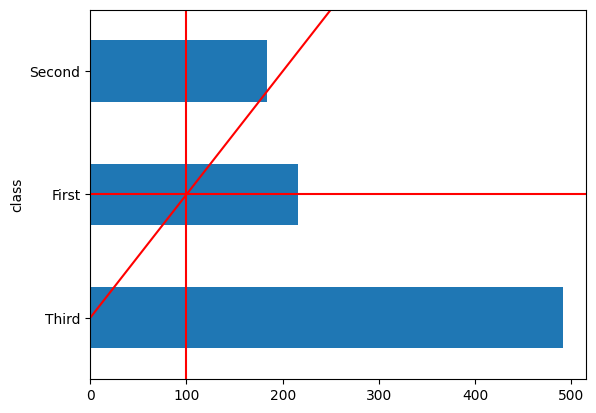

In [156]:
# plot
titanic.value_counts("class").plot(kind="barh")
import matplotlib.pyplot as plt
# lines
plt.axvline(x=100, color="red")
plt.axhline(y=1, color="red")
plt.axline((0, 0), (100, 1), color="red")

In [164]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


                            OLS Regression Results                            
Dep. Variable:               survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.54e-25
Time:                        18:30:54   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8386      0.045     18.597      0.0

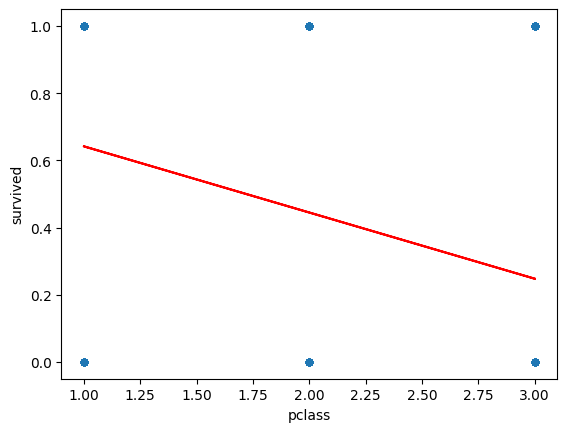

In [179]:
import statsmodels.api as sm
import seaborn as sns

x_col = "pclass"
y_col = "survived"

df = titanic.loc[:, [x_col, y_col]].dropna()

df.plot.scatter(x=x_col, y=y_col)
# trend line
X = sm.add_constant(df[x_col])
y = df[y_col]
model = sm.OLS(y, X).fit()
print(model.summary())
y_hat = model.predict(X)
plt.plot(df[x_col], y_hat, color="red")

/home/domyz/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


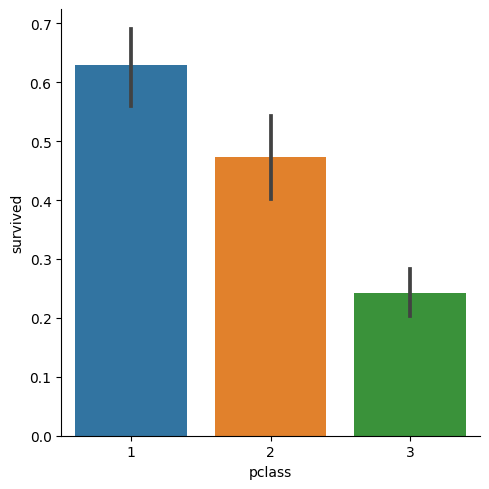

In [180]:
sns.catplot(x=x_col, y=y_col, data=df, kind="bar")

<Axes: xlabel='age'>

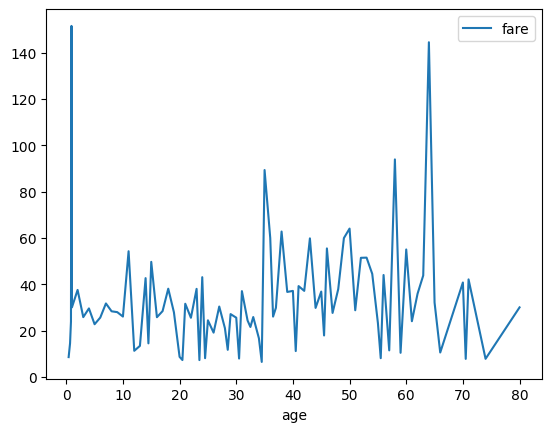

In [181]:
(
    titanic.groupby("age")
    .agg(fare=("fare", np.mean))
    .reset_index()
    .plot(kind="line", x="age", y="fare")
)